In [128]:
import numpy as np
import random
import math
import statistics
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [129]:
#define some constants
runs=100
timesteps=1000
mu1=5
sigma1=math.sqrt(10)
mu21=10
sigma21=math.sqrt(15)
mu22=4
sigma22=math.sqrt(10)
epsilons=[0,0.1,0.2,0.5]


In [130]:
def epsilonGreedy(qa1,qa2,epsilon):
  qlist=[qa1,qa2]
  action = np.random.uniform()
  # exploration
  if(action<epsilon):
    #print("in exploration")
    greedy_choice=random.randint(0,1)
    #print("greedy choice:{}".format(greedy_choice))
    if(greedy_choice==0):
      reward = np.random.normal(mu1,sigma1,1)
      action_taken=1
    else:
      action_taken=2
      action2gmm = np.random.uniform()
      if(action2gmm>0.5):
        #print("22")
        reward=np.random.normal(mu22,sigma22,1)
      else:
        #print("21")
        reward=np.random.normal(mu21,sigma21,1)
    return reward,action_taken
  # greedy approach - exploitation
  # randommization for equal case
  maxq=max(qlist)
  maxindex=qlist.index(maxq)
  if(qlist[0]==qlist[1]):
    maxindex=random.randint(0,1)
  #print(maxindex)
  if(maxindex==0):
    action_taken=1
    reward = np.random.normal(mu1,sigma1,1)
  else:
    action_taken=2
    action2gmm = np.random.uniform()
    if(action2gmm>0.5):
      #print("22")
      reward=np.random.normal(mu22,sigma22,1)
    else:
      #print("21")
      reward=np.random.normal(mu21,sigma21,1)
  return reward,action_taken

In [131]:
#test epsilon greedy method
epsilonGreedy(2,6,0.5)

(array([1.21477186]), 2)

In [132]:
def run_epsilon_greedy(alpha_index):
  
  epsilon_count=-1
  averagedRewardsList=[]
  #accumulatedReward2=[]
  #accumulatedReward3=[]
  #accumulatedReward4=[]
  for epsilon in epsilons:
    epsilon_count+=1
    Qa1list=[]
    Qa2list=[]
    accumulatedReward=[]
    for run in range(runs):
      Qa1=np.array(0.0)
      Qa2=np.array(0.0)
      runReward=[] # list of cumulative rewards in one run
      cumulative_reward=0
      for k in range(timesteps):
        alpha_list=[1,0.9**(k+1),1/(1+math.log(k+2)),1/(k+1)]
        alpha=alpha_list[alpha_index]
        reward,action_taken=epsilonGreedy(Qa1,Qa2,epsilon)
        if(action_taken==1):
          Qa1=Qa1+alpha*(reward-Qa1)
        else:
          Qa2=Qa2+alpha*(reward-Qa2)
        #cumulative_reward+=reward
        runReward.append(reward)
      #print(runReward)
      #print(len(runReward))
      runReward=np.cumsum(runReward)
      for i in range(len(runReward)):
        runReward[i]=runReward[i]/(i+1)
      #print(runReward)
      accumulatedReward.append(runReward)
      #print(type(Qa1))
      #print(type(Qa2))
      #print(Qa1)
      #print(Qa2)
      #if(Qa2!=0):
      #  print(Qa2)
      Qa1list.append(Qa1)
      Qa2list.append(Qa2)
    # at the end of all runs
    #averagedRewards=[sum(col)/len(col) for col in zip(*accumulatedReward)]
    #print((accumulatedReward))
    averagedRewards=np.mean(accumulatedReward,axis=0)
    #print(type(Qa1list))
    #print(len(Qa1list))
    #print(Qa2list)
    avgQa1=np.mean(Qa1list)
    avgQa2=np.mean(Qa2list)
    print("epsilon {} avg. Qa1 {} avg. Qa2 {}".format(epsilon, avgQa1, avgQa2))
    #bob.plot(range(1000),averagedRewards,color =color_list[epsilon_count])
    #print(len(averagedRewards))
    averagedRewardsList.append(averagedRewards)
  #print(len(averagedRewardsList))
  return averagedRewardsList

In [133]:
averagedRewards0=run_epsilon_greedy(0)
averagedRewards1=run_epsilon_greedy(1)
averagedRewards2=run_epsilon_greedy(2)
averagedRewards3=run_epsilon_greedy(3)
color_list=['red','blue','yellow','green']

epsilon 0 avg. Qa1 0.6080725980098722 avg. Qa2 0.20270983189340278
epsilon 0.1 avg. Qa1 2.524453664665641 avg. Qa2 3.7792420274529377
epsilon 0.2 avg. Qa1 3.1107458329732696 avg. Qa2 3.7532688506940817
epsilon 0.5 avg. Qa1 4.420429221923743 avg. Qa2 6.109052252214087


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


epsilon 0 avg. Qa1 [2.35998832] avg. Qa2 [3.49884973]
epsilon 0.1 avg. Qa1 3.0540426830350382 avg. Qa2 4.473323739273505
epsilon 0.2 avg. Qa1 3.446791319828864 avg. Qa2 5.588920876711187
epsilon 0.5 avg. Qa1 4.3288802981349255 avg. Qa2 6.33288300302606
epsilon 0 avg. Qa1 [2.35830256] avg. Qa2 [3.59148591]
epsilon 0.1 avg. Qa1 4.419569301799046 avg. Qa2 6.572271801141439
epsilon 0.2 avg. Qa1 4.641733555276451 avg. Qa2 6.742460120538511
epsilon 0.5 avg. Qa1 4.923153890765081 avg. Qa2 6.877804021929311
epsilon 0 avg. Qa1 [2.8252109] avg. Qa2 [2.93659602]
epsilon 0.1 avg. Qa1 3.23046604321645 avg. Qa2 4.640681370210673
epsilon 0.2 avg. Qa1 3.554086827942951 avg. Qa2 5.413524388281471
epsilon 0.5 avg. Qa1 4.426295766718664 avg. Qa2 6.531467377427187


In [134]:
#sanity check on obtained values
print(len(averagedRewards0[1]))
print(averagedRewards0[0][0])
print(averagedRewards0[0][999])

1000
6.158003951414008
5.986097485506905


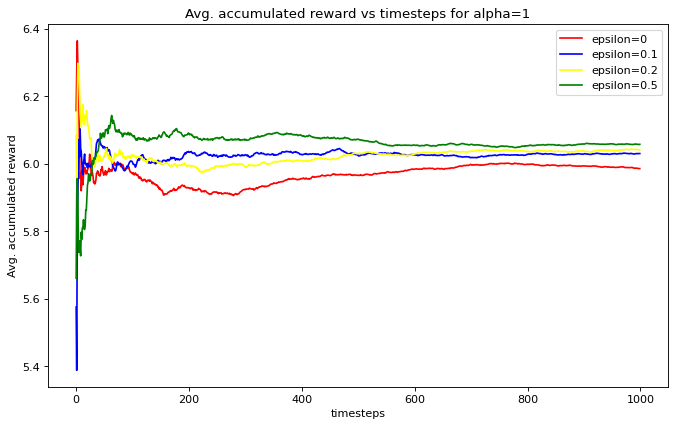

In [135]:
#define plot
#figure(figsize=(8, 6), dpi=80)
fig, bob = plt.subplots(figsize=(10, 6),dpi=80)
bob.set(title = "Avg. accumulated reward vs timesteps for alpha=1",
      xlabel = "timesteps", 
      ylabel = "Avg. accumulated reward")


for i in range(4):
  bob.plot(range(1000),averagedRewards0[i],color =color_list[i])
plt.legend(['epsilon=0','epsilon=0.1','epsilon=0.2','epsilon=0.5'])
plt.show()

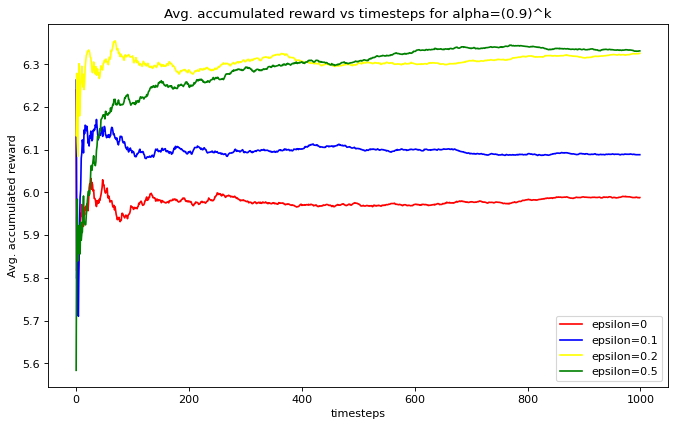

In [136]:
#define plot for 2nd alpha
#figure(figsize=(8, 6), dpi=80)
fig, bob = plt.subplots(figsize=(10, 6),dpi=80)
bob.set(title = "Avg. accumulated reward vs timesteps for alpha=(0.9)^k",
      xlabel = "timesteps", 
      ylabel = "Avg. accumulated reward")

for i in range(4):
  bob.plot(range(1000),averagedRewards1[i],color =color_list[i])
plt.legend(['epsilon=0','epsilon=0.1','epsilon=0.2','epsilon=0.5'])
plt.show()

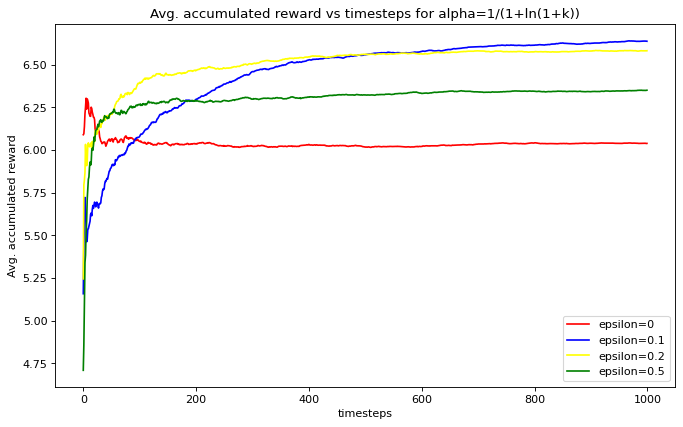

In [137]:
#define plot for 3rd alpha
#figure(figsize=(8, 6), dpi=80)
fig, bob = plt.subplots(figsize=(10, 6),dpi=80)
bob.set(title = "Avg. accumulated reward vs timesteps for alpha=1/(1+ln(1+k))",
      xlabel = "timesteps", 
      ylabel = "Avg. accumulated reward")
#plt.legend(['Class 0','Class 1'])

for i in range(4):
  bob.plot(range(1000),averagedRewards2[i],color =color_list[i])
plt.legend(['epsilon=0','epsilon=0.1','epsilon=0.2','epsilon=0.5'])
plt.show()

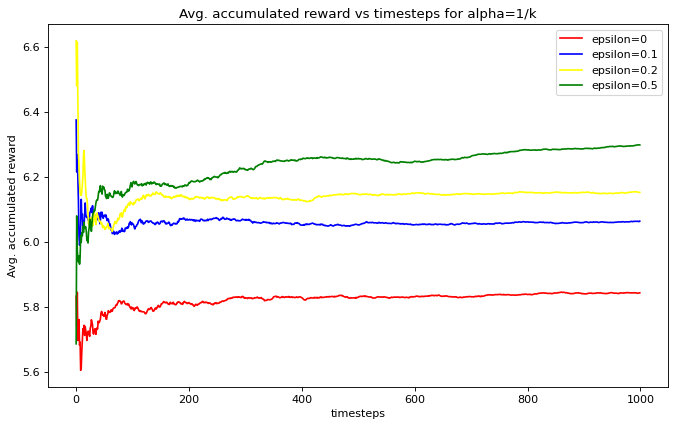

In [138]:
#define plot for 4th alpha
#figure(figsize=(8, 6), dpi=80)
fig, bob = plt.subplots(figsize=(10, 6),dpi=80)
bob.set(title = "Avg. accumulated reward vs timesteps for alpha=1/k",
      xlabel = "timesteps", 
      ylabel = "Avg. accumulated reward")
#plt.legend(['Class 0','Class 1'])

for i in range(4):
  bob.plot(range(1000),averagedRewards3[i],color =color_list[i])
plt.legend(['epsilon=0','epsilon=0.1','epsilon=0.2','epsilon=0.5'])
plt.show()

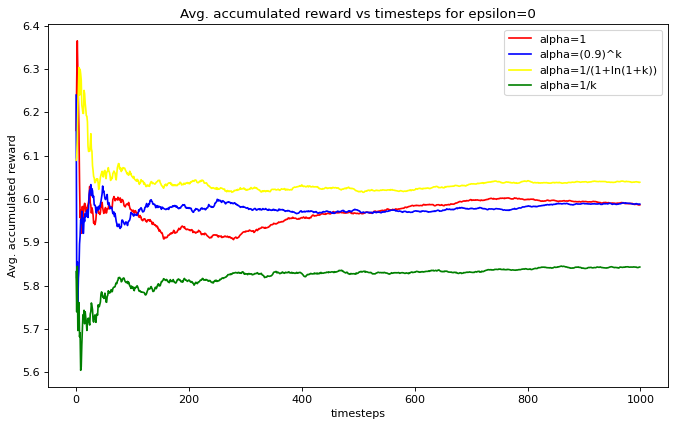

In [149]:
# plot average accumulated rewards per timestep vs timestep for same epsilon but different alphas
averagedRewards=[averagedRewards0,averagedRewards1,averagedRewards2,averagedRewards3]
fig, bob = plt.subplots(figsize=(10, 6),dpi=80)
bob.set(title = "Avg. accumulated reward vs timesteps for epsilon=0",
      xlabel = "timesteps", 
      ylabel = "Avg. accumulated reward")
for i in range(4):
  bob.plot(range(1000),averagedRewards[i][0],color =color_list[i])
plt.legend(['alpha=1','alpha=(0.9)^k','alpha=1/(1+ln(1+k))','alpha=1/k'])
plt.show()

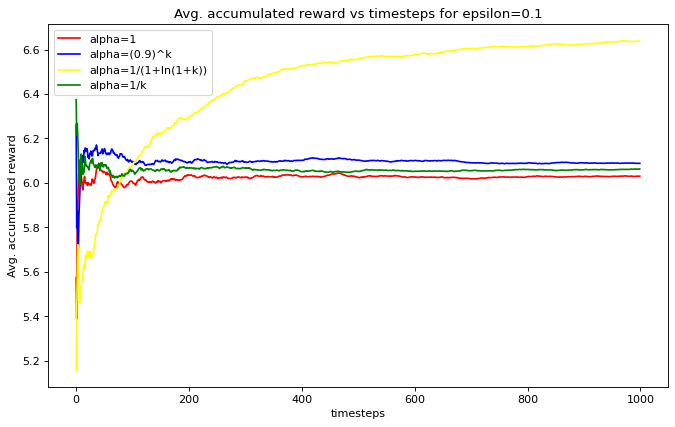

In [150]:
averagedRewards=[averagedRewards0,averagedRewards1,averagedRewards2,averagedRewards3]
fig, bob = plt.subplots(figsize=(10, 6),dpi=80)
bob.set(title = "Avg. accumulated reward vs timesteps for epsilon=0.1",
      xlabel = "timesteps", 
      ylabel = "Avg. accumulated reward")
for i in range(4):
  bob.plot(range(1000),averagedRewards[i][1],color =color_list[i])
plt.legend(['alpha=1','alpha=(0.9)^k','alpha=1/(1+ln(1+k))','alpha=1/k'])
plt.show()

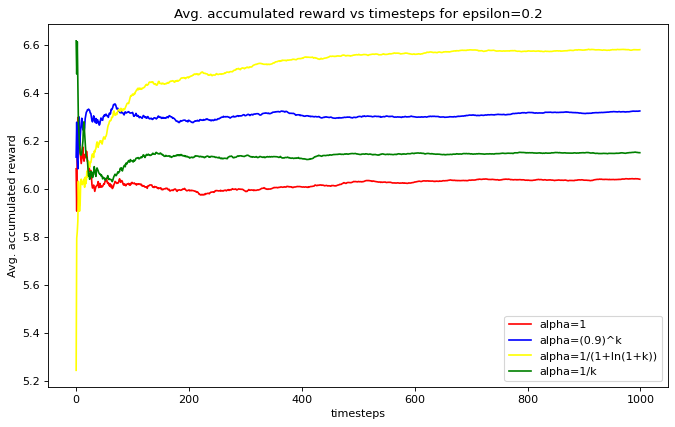

In [151]:
averagedRewards=[averagedRewards0,averagedRewards1,averagedRewards2,averagedRewards3]
fig, bob = plt.subplots(figsize=(10, 6),dpi=80)
bob.set(title = "Avg. accumulated reward vs timesteps for epsilon=0.2",
      xlabel = "timesteps", 
      ylabel = "Avg. accumulated reward")
for i in range(4):
  bob.plot(range(1000),averagedRewards[i][2],color =color_list[i])
plt.legend(['alpha=1','alpha=(0.9)^k','alpha=1/(1+ln(1+k))','alpha=1/k'])
plt.show()

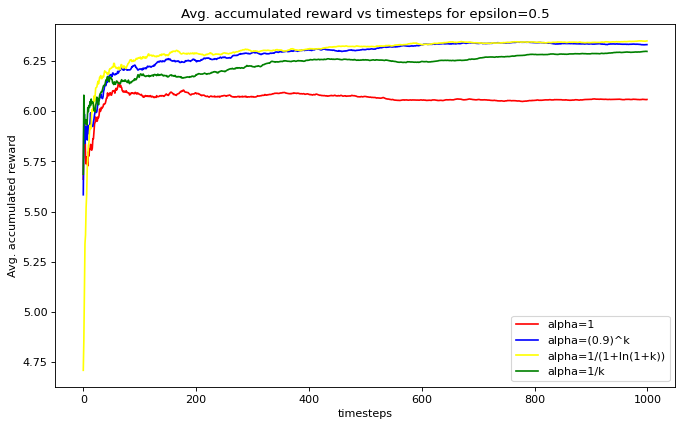

In [152]:
averagedRewards=[averagedRewards0,averagedRewards1,averagedRewards2,averagedRewards3]
fig, bob = plt.subplots(figsize=(10, 6),dpi=80)
bob.set(title = "Avg. accumulated reward vs timesteps for epsilon=0.5",
      xlabel = "timesteps", 
      ylabel = "Avg. accumulated reward")
for i in range(4):
  bob.plot(range(1000),averagedRewards[i][3],color =color_list[i])
plt.legend(['alpha=1','alpha=(0.9)^k','alpha=1/(1+ln(1+k))','alpha=1/k'])
plt.show()

In [139]:
def run_optimistic_epsilon_greedy(qa1,qa2):
  epsilon=0.1
  alpha=0.1
  Qa1list=[]
  Qa2list=[]
  accumulatedReward=[]
  for run in range(runs):
    Qa1=np.array(0.0)
    Qa2=np.array(0.0)
    runReward=[] # list of cumulative rewards in one run
    cumulative_reward=0
    for k in range(timesteps):  
      reward,action_taken=epsilonGreedy(Qa1,Qa2,epsilon)
      if(action_taken==1):
        Qa1=Qa1+alpha*(reward-Qa1)
      else:
        Qa2=Qa2+alpha*(reward-Qa2)
      runReward.append(reward)
    runReward=np.cumsum(runReward)
    for i in range(len(runReward)):
      runReward[i]=runReward[i]/(i+1)
    accumulatedReward.append(runReward)
    Qa1list.append(Qa1)
    Qa2list.append(Qa2)
  # average over all runs
  averagedRewards=np.mean(accumulatedReward,axis=0)
  avgQa1=np.mean(Qa1list)
  avgQa2=np.mean(Qa2list)
  print("epsilon {} avg. Qa1 {} avg. Qa2 {}".format(epsilon, avgQa1, avgQa2))
  return averagedRewards

In [140]:
optAvgRewards0 = run_optimistic_epsilon_greedy(0,0)
optAvgRewards1 = run_optimistic_epsilon_greedy(5,7)
optAvgRewards2 = run_optimistic_epsilon_greedy(20,20)


epsilon 0.1 avg. Qa1 4.481472505331251 avg. Qa2 6.797233398531201
epsilon 0.1 avg. Qa1 4.66439593815451 avg. Qa2 6.851496262646456
epsilon 0.1 avg. Qa1 4.522203598632093 avg. Qa2 6.842931425513806


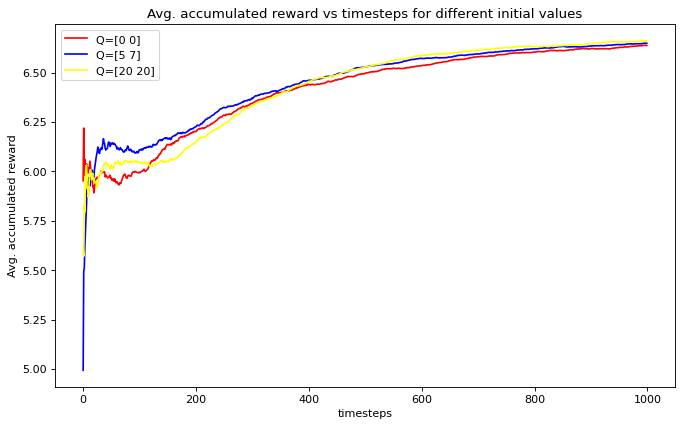

In [141]:
fig, bob = plt.subplots(figsize=(10, 6),dpi=80)
bob.set(title = "Avg. accumulated reward vs timesteps for different initial values",
      xlabel = "timesteps", 
      ylabel = "Avg. accumulated reward")
#plt.legend(['Class 0','Class 1'])
bob.plot(range(1000),optAvgRewards0,color =color_list[0])
bob.plot(range(1000),optAvgRewards1,color =color_list[1])
bob.plot(range(1000),optAvgRewards2,color =color_list[2])
plt.legend(['Q=[0 0]','Q=[5 7]','Q=[20 20]'])
plt.show()

**PART C**

In [142]:
def gradient_policy(maxindex,maxprob):
  actionToTake=np.random.uniform()
  if(maxindex==0):
    if(actionToTake<maxprob):
      reward=np.random.normal(mu1,sigma1,1)
      actionTaken=1
    else:
      partToSelect=np.random.uniform()
      actionTaken=2
      if(partToSelect>0.5):
        reward=np.random.normal(mu22,sigma22,1)
      else:
        reward=np.random.normal(mu21,sigma21,1)
  else:
    if(actionToTake<maxprob):
      actionTaken=2
      partToSelect=np.random.uniform()
      if(partToSelect>0.5):
        reward=np.random.normal(mu22,sigma22,1)
      else:
        reward=np.random.normal(mu21,sigma21,1)
    else:
      actionTaken=1
      reward=np.random.normal(mu1,sigma1,1) 
  return reward,actionTaken

In [143]:
gradient_policy(1,0.6)

(array([7.34246247]), 2)

In [144]:
def run_gradient_policy(Ha1arg,Ha2arg):  
  alpha=0.1
  averagedRewards=[]
  for j in range(runs):
    runRewardList=[]
    sum_reward=0
    Ha1=Ha1arg
    Ha2=Ha2arg
    a1=np.exp(Ha1)/(np.exp(Ha1)+np.exp(Ha2))
    a2=np.exp(Ha2)/(np.exp(Ha1)+np.exp(Ha2))
    for i in range(timesteps):
      alist=[a1,a2]
      maxa=max(alist)
      maxindex=alist.index(maxa)
      #randomization for equal case
      if(a1==a2):
        maxindex=random.randint(0,1)
        maxa=alist[maxindex]
      reward,actionTaken=gradient_policy(maxindex,maxa)
      sum_reward+=reward
      avg_reward=sum_reward/(i+1)
      runRewardList.append(avg_reward)
      if(actionTaken==1):
        # a1 is selected
        Ha1=Ha1+alpha*(reward-avg_reward)*(1-a1)
        Ha2=Ha2-alpha*(reward-avg_reward)*a2
      else:
        # a2 is selected
        Ha2=Ha2+alpha*(reward-avg_reward)*(1-a2)
        Ha1=Ha1-alpha*(reward-avg_reward)*a1
      a1=np.exp(Ha1)/(np.exp(Ha1)+np.exp(Ha2))
      a2=np.exp(Ha2)/(np.exp(Ha1)+np.exp(Ha2))
    averagedRewards.append(runRewardList)
  print(averagedRewards)
  print(len(averagedRewards))
  print(len(averagedRewards[0]))
  finalRewards=np.mean(averagedRewards,axis=0)
  return finalRewards

In [145]:
gradientAvgrewards=run_gradient_policy(0,0)

[[array([7.74160414]), array([14.13467443]), array([9.5905668]), array([9.0423213]), array([7.47098927]), array([8.23678657]), array([8.79418711]), array([8.03778209]), array([8.13995684]), array([7.73187064]), array([8.07067821]), array([8.43701817]), array([8.25634414]), array([7.95616279]), array([7.85295243]), array([8.01980427]), array([8.24889566]), array([7.91149067]), array([7.9508471]), array([7.85365077]), array([7.25429886]), array([7.34471905]), array([7.35333069]), array([7.56913517]), array([7.41670054]), array([7.51856897]), array([7.59118538]), array([7.45416856]), array([7.66162154]), array([7.82244989]), array([7.84993542]), array([7.72217152]), array([7.68624651]), array([7.83908113]), array([7.64640995]), array([7.78351881]), array([7.58382302]), array([7.47858142]), array([7.29538966]), array([7.37483019]), array([7.3485643]), array([7.49671843]), array([7.33292041]), array([7.41105702]), array([7.30804079]), array([7.28275611]), array([7.23119758]), array([7.05184

In [146]:
print(len(gradientAvgrewards))

1000


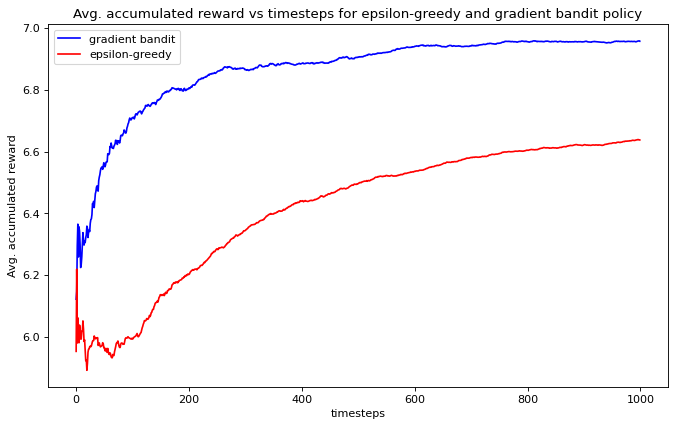

In [147]:
fig, bob = plt.subplots(figsize=(10, 6),dpi=80)
bob.set(title = "Avg. accumulated reward vs timesteps for epsilon-greedy and gradient bandit policy",
      xlabel = "timesteps", 
      ylabel = "Avg. accumulated reward")
#plt.legend(['Class 0','Class 1'])
bob.plot(range(1000),gradientAvgrewards,color =color_list[1])
bob.plot(range(1000),optAvgRewards0,color =color_list[0])
plt.legend(['gradient bandit','epsilon-greedy'])
plt.show()

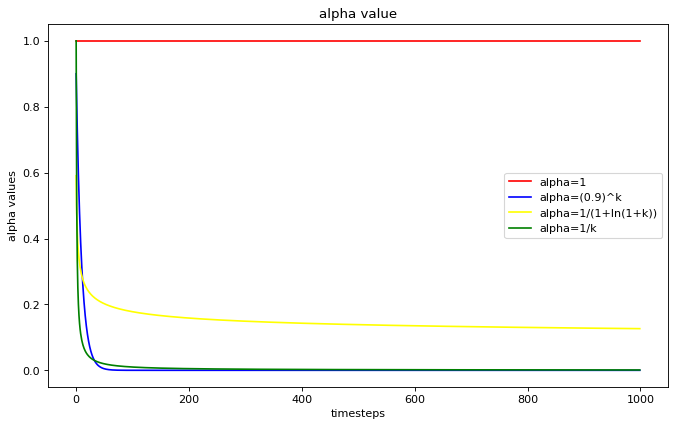

In [148]:
# plot timestep varying alpha values over 1000 timsteps
alpha1=[]
alpha2=[]
alpha3=[]
alpha4=[]
for i in range(1000):
  alpha_list=[1,0.9**(i+1),1/(1+math.log(i+2)),1/(i+1)]
  alpha1.append(alpha_list[0])
  alpha2.append(alpha_list[1])
  alpha3.append(alpha_list[2])
  alpha4.append(alpha_list[3])
fig, bob = plt.subplots(figsize=(10, 6),dpi=80)
bob.set(title = "alpha value",
      xlabel = "timesteps", 
      ylabel = "alpha values")
#plt.legend(['Class 0','Class 1'])
bob.plot(range(1000),alpha1,color =color_list[0])
bob.plot(range(1000),alpha2,color =color_list[1])
bob.plot(range(1000),alpha3,color =color_list[2])
bob.plot(range(1000),alpha4,color =color_list[3])
plt.legend(['alpha=1','alpha=(0.9)^k','alpha=1/(1+ln(1+k))','alpha=1/k'])
plt.show()